# Loading the IMDB Dataset

In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models

In [2]:
(train_data, train_labels),(test_data, test_labels) = keras.datasets.imdb.load_data(num_words = 10000)

In [3]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [4]:
train_labels[0]

1

In [5]:
max([max(sequence) for sequence in train_data])

9999

In [6]:
# Decoding reviews back to English
word_index = keras.datasets.imdb.get_word_index()


In [7]:
reverse_word_index = dict([(value,key) for (key,value) in word_index.items()])
decode_reviews = ' '.join([reverse_word_index.get(i - 3,',') for i in train_data[0]])
print(decode_reviews)

, this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert , is an amazing actor and now the same being director , father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for , and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also , to the two little boy's that played the , of norman and paul they were just brilliant children are often left out of the , list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

# Encoding the Integer Sequence into a Binary Matrix

In [8]:
# Vectorizing training and test data
def vectorize_sequence(sequences, dimension = 10000):
    results = np.zeros((len(sequences),dimension))
    for i , sequence in enumerate(sequences):
        results[i,sequence] = 1.
        return results
x_train = vectorize_sequence(train_data)
x_test  = vectorize_sequence(test_data)

In [9]:
x_test[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [10]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [11]:
# Vectorizing labels

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

# The Model Definition

In [12]:
from tensorflow.keras import layers
from tensorflow.keras import models

In [13]:
model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1,  activation = 'sigmoid'))

# Compiling the Model

In [14]:
model.compile(
            optimizer = 'rmsprop',
            loss      = 'binary_crossentropy',
            metrics   = ['accuracy'])

# Configuring the Optimizer and using custom losses and materics

In [15]:
from tensorflow.keras import optimizers
from tensorflow.keras import losses
from tensorflow.keras import metrics

model.compile(
            optimizer = optimizers.RMSprop(lr = 0.001),
            loss      = losses.binary_crossentropy,
            metrics   = [metrics.binary_accuracy])


# Setting aside a Validation set

In [16]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [17]:
x_val

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [18]:
y_val

array([1., 0., 0., ..., 1., 0., 0.], dtype=float32)

# Training Your Model

In [19]:
model.compile(
            optimizer = optimizers.RMSprop(lr = 0.001),
            loss      = losses.binary_crossentropy,
            metrics   = [metrics.binary_accuracy])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs = 20,
                    batch_size= 512,
                    validation_data=(x_val,y_val))

Epoch 1/20
30/30 [==============================] - 6s 191ms/step - loss: 0.6932 - binary_accuracy: 0.5019 - val_loss: 0.6932 - val_binary_accuracy: 0.4948
Epoch 2/20
30/30 [==============================] - 3s 107ms/step - loss: 0.6931 - binary_accuracy: 0.5035 - val_loss: 0.6932 - val_binary_accuracy: 0.4948
Epoch 3/20
30/30 [==============================] - 2s 82ms/step - loss: 0.6931 - binary_accuracy: 0.5035 - val_loss: 0.6932 - val_binary_accuracy: 0.4948
Epoch 4/20
30/30 [==============================] - 3s 109ms/step - loss: 0.6931 - binary_accuracy: 0.5035 - val_loss: 0.6932 - val_binary_accuracy: 0.4948
Epoch 5/20
30/30 [==============================] - 3s 100ms/step - loss: 0.6931 - binary_accuracy: 0.5035 - val_loss: 0.6932 - val_binary_accuracy: 0.4948
Epoch 6/20
30/30 [==============================] - 3s 116ms/step - loss: 0.6931 - binary_accuracy: 0.5035 - val_loss: 0.6932 - val_binary_accuracy: 0.4948
Epoch 7/20
30/30 [==============================] - 2s 68ms/step 

In [20]:
history_dict = history.history
history_dict.keys()


dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

# Ploting the Training and Validation loss

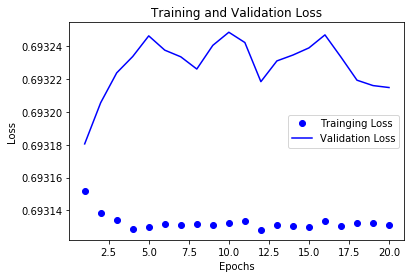

In [25]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values  = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1,len(history_dict['binary_accuracy']) + 1)

plt.plot(epochs,loss_values,'bo',label = 'Trainging Loss')
plt.plot(epochs,val_loss_values,'b',label = 'Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Ploting the Training and Validation Accuracy

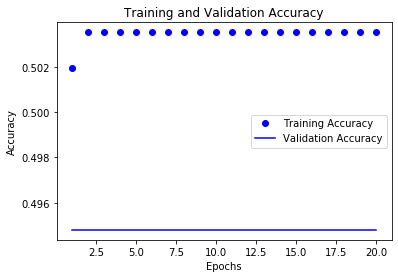

In [27]:
# plt.clf() # To clear the figure

acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']

plt.plot(epochs, acc_values, 'bo', label = 'Training Accuracy')
plt.plot(epochs , val_acc_values, 'b', label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# Retraining a Model from Scratch

In [29]:
model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1,  activation = 'sigmoid'))

model.compile(
            optimizer  ='rmsprop',
            loss       = 'binary_crossentropy',
            metrics    = ['accuracy'])

model.fit(x_train,y_train,epochs = 10,batch_size = 512)
results = model.evaluate(x_test,y_test)

Epoch 1/10
49/49 [==============================] - 3s 62ms/step - loss: 0.6932 - accuracy: 0.4979
Epoch 2/10
49/49 [==============================] - 2s 35ms/step - loss: 0.6932 - accuracy: 0.4980
Epoch 3/10
49/49 [==============================] - 1s 29ms/step - loss: 0.6932 - accuracy: 0.4970
Epoch 4/10
49/49 [==============================] - 1s 25ms/step - loss: 0.6931 - accuracy: 0.4970
Epoch 5/10
49/49 [==============================] - 1s 26ms/step - loss: 0.6931 - accuracy: 0.4984
Epoch 6/10
49/49 [==============================] - 1s 25ms/step - loss: 0.6931 - accuracy: 0.4991
Epoch 7/10
49/49 [==============================] - 1s 25ms/step - loss: 0.6932 - accuracy: 0.4979
Epoch 8/10
49/49 [==============================] - 1s 24ms/step - loss: 0.6931 - accuracy: 0.4961
Epoch 9/10
49/49 [==============================] - 1s 24ms/step - loss: 0.6931 - accuracy: 0.4987
Epoch 10/10
782/782 [==============================] - 4s 5ms/step - loss: 0.6932 - accuracy: 0.5000


In [30]:
results

[0.6931563019752502, 0.4999600052833557]

In [31]:
model.predict(x_test)

array([[0.59591484],
       [0.499175  ],
       [0.499175  ],
       ...,
       [0.499175  ],
       [0.499175  ],
       [0.499175  ]], dtype=float32)

# Further Experiments

In [32]:
model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(32, activation = 'relu'))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1,  activation = 'sigmoid'))

model.compile(
            optimizer  ='rmsprop',
            loss       = 'binary_crossentropy',
            metrics    = ['accuracy'])

model.fit(x_train,y_train,epochs = 5,batch_size = 512)
results = model.evaluate(x_test,y_test)


Epoch 1/5
49/49 [==============================] - 5s 106ms/step - loss: 0.6932 - accuracy: 0.4981
Epoch 2/5
49/49 [==============================] - 3s 57ms/step - loss: 0.6932 - accuracy: 0.4951
Epoch 3/5
49/49 [==============================] - 3s 54ms/step - loss: 0.6932 - accuracy: 0.4942
Epoch 4/5
49/49 [==============================] - 3s 54ms/step - loss: 0.6931 - accuracy: 0.4971
Epoch 5/5
782/782 [==============================] - 8s 10ms/step - loss: 0.6932 - accuracy: 0.5000


[0.6931533813476562, 0.5]

In [36]:
model = models.Sequential()
model.add(layers.Dense(64, activation = 'tanh', input_shape = (10000,)))
model.add(layers.Dense(32, activation = 'tanh'))
model.add(layers.Dense(16, activation = 'tanh'))
model.add(layers.Dense(1,  activation = 'sigmoid'))

model.compile(
            optimizer  ='rmsprop',
            loss       = 'mse',
            metrics    = ['accuracy'])

model.fit(x_train,y_train,epochs = 5,batch_size = 512)
results = model.evaluate(x_test,y_test)

Epoch 1/5
49/49 [==============================] - 3s 58ms/step - loss: 0.2500 - accuracy: 0.5036
Epoch 2/5
49/49 [==============================] - 3s 54ms/step - loss: 0.2501 - accuracy: 0.5000
Epoch 3/5
49/49 [==============================] - 3s 54ms/step - loss: 0.2501 - accuracy: 0.4959
Epoch 4/5
49/49 [==============================] - 3s 53ms/step - loss: 0.2500 - accuracy: 0.4971
Epoch 5/5
782/782 [==============================] - 8s 10ms/step - loss: 0.2500 - accuracy: 0.5000


In [37]:
results

[0.2500021457672119, 0.5]

In [38]:
model = models.Sequential()
model.add(layers.Dense(64, activation = 'tanh', input_shape = (10000,)))
model.add(layers.Dense(32, activation = 'tanh'))
model.add(layers.Dense(16, activation = 'tanh'))
model.add(layers.Dense(1,  activation = 'sigmoid'))

model.compile(
            optimizer  ='rmsprop',
            loss       = 'binary_crossentropy',
            metrics    = ['accuracy'])

model.fit(x_train,y_train,epochs = 5,batch_size = 512)
results = model.evaluate(x_test,y_test)

Epoch 1/5
49/49 [==============================] - 5s 106ms/step - loss: 0.6933 - accuracy: 0.4984
Epoch 2/5
49/49 [==============================] - 3s 57ms/step - loss: 0.6932 - accuracy: 0.5030
Epoch 3/5
49/49 [==============================] - 3s 53ms/step - loss: 0.6933 - accuracy: 0.4970
Epoch 4/5
49/49 [==============================] - 3s 53ms/step - loss: 0.6932 - accuracy: 0.4962
Epoch 5/5
782/782 [==============================] - 8s 10ms/step - loss: 0.6932 - accuracy: 0.5000


In [39]:
results

[0.6931540369987488, 0.5]